**Set up env & import raw data**

In [ ]:
import numpy as np # linear algebraa
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
!pip install gdown

In [2]:
# List folder for demo
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
# List GPUs
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

print(get_available_gpus())

['/device:GPU:0']


In [6]:
# set up spark context


!pip install pyspark==3.0.1 py4j==0.10.9
import pandas as pd

from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("MyApp") \
    .config("spark.executor.memory", "8g") \
    .config("spark.driver.memory", "8g") \
    .config("spark.sql.shuffle.partitions", "1000")\
    .getOrCreate()

import logging


# Set logging level to ERROR to suppress WARN messages
logger = spark._jvm.org.apache.log4j
logger.LogManager.getRootLogger().setLevel(logger.Level.ERROR)


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.2/204.2 MB 7.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 14.2 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612223 sha256=8f1c306b3747edb47d00577f764fbe330d10b59f28ad7a0b4a539d21cc6d4716
  Stored in directory: /root/.cache/pip/wheels/19/b0/c8/6cb894117070e130fc44352c2a13f15b6c27e440d04a84fb48
Successfully built pyspark
  Attempting uninstall: py4j
    Found existing installation: py4j 0.10.9.7
    Uninstalling py4j-0.10.9.7:
      Successfully uninstalled py4j-0.10.9.7


/opt/conda/lib/python3.10/subprocess.py:1796: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = _posixsubprocess.fork_exec(
24/10/11 06:18:15 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


**Input data** 

In [ ]:
!gdown --id 11WAZsSwY627PCzVUZwJnYz-MQ4OGqiEA
!unzip "/kaggle/working/datafortrainingmodelfinal_csv.zip" -d /kaggle/working/

In [8]:
import zipfile
import os
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("CSV Reader").getOrCreate()

# Path to the zip file
zip_path = "/kaggle/working/datafortrainingmodelfinal_csv.zip"
extract_path = "/kaggle/working/extracted_files"

# Step 1: Extract the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Step 2: Read all CSV.gz files into one DataFrame
import os

# Read file CSV.GZ in folder 
csv_files = []
for root, dirs, files in os.walk(extract_path):
    for file in files:
        if file.endswith('.csv.gz'):
            csv_files.append(os.path.join(root, file))

filtered_outliers_df = spark.read.option("header", True).csv(csv_files)



# Show the DataFrame (for confirmation)

from pyspark.sql import SparkSession
from pyspark.sql.types import DoubleType
from pyspark.sql.functions import col,to_date,when


filtered_outliers_df = filtered_outliers_df.withColumn('order_date', to_date(col('order_date'), 'yyyy-MM-dd')) # Định dạng mẫu ví dụ
filtered_outliers_df = filtered_outliers_df.withColumn('settlement_date', to_date(col('settlement_date'), 'yyyy-MM-dd')) # Định dạng mẫu ví dụ
filtered_outliers_df= filtered_outliers_df.withColumn('totalec_sr', col('totalec_sr').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('totalNSR_sr', col('totalNSR_sr').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('totalNSR_so', col('totalNSR_so').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('totalec_so', col('totalec_so').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('diff_ec', col('diff_ec').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('diff_NSR', col('diff_NSR').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('distance_km', col('distance_km').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('DeliveryDay', col('DeliveryDay').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('days_off_count', col('days_off_count').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('Dayprocessing', col('Dayprocessing').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('Ontime', col('Ontime').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('Infull', col('Infull').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('DIFOT', col('DIFOT').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('% urbanization rate', col('% urbanization rate').cast(DoubleType()))
filtered_outliers_df= filtered_outliers_df.withColumn('isfreegood_order_no', col('isfreegood_order_no').cast(DoubleType()))


filtered_outliers_df.show(2)
filtered_outliers_df.printSchema()


+--------------------+--------------------+----------+---------------+-----------------+----------------+-------------+------------+-----------+------------+---------+---------+---------+---------+--------------------+----------+-----------+-----------+----------+-------+--------+--------------+---------------+---------------+----------------+-----------------+-----------+--------------+-------------+------+------+-----+---------------+-----------------+-------------------+-------------------+
|                 key|           order_key|order_date|settlement_date|           region|distributor_code|customer_code|segmentation|channelname|    order_no|item_code|    brand|pack_type|pack_size|              key_so|totalec_sr|totalNSR_sr|totalNSR_so|totalec_so|diff_ec|diff_NSR|GPScuslatitude|GPScuslongitude|GPSdistlatitude|GPSdistlongitude|      distance_km|DeliveryDay|days_off_count|Dayprocessing|Ontime|Infull|DIFOT|           city|Province standard|% urbanization rate|isfreegood_order_no|
+-

**Visualization**

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
import plotly.express as px

In [ ]:
from pyspark.sql import functions as F
import numpy as np
from pyspark.sql.functions import month, year
import seaborn as sns
import matplotlib.pyplot as plt


# Tạo bảng với số lượng đơn hàng khác nhau khi DIFOT = 0 và DIFOT = 1

summary_df = filtered_outliers_df.groupBy("customer_code","GPScuslongitude","GPScuslatitude") \
    .agg(
        F.countDistinct(F.when(F.col('DIFOT') == 0, F.col('order_no'))).alias('order_non_difot'),
        F.countDistinct(F.when(F.col('DIFOT') == 1, F.col('order_no'))).alias('order_difot')
    )

# Thêm cột % DIFOT (tính theo phần trăm)
summary_df = summary_df.withColumn(
    '%DIFOT',
    (F.col('order_difot') / (F.col('order_non_difot') + F.col('order_difot')) * 100)
)
summary_df = summary_df.toPandas()
summary_df = summary_df.dropna(subset=["GPScuslongitude","GPScuslatitude"])
df_geo = gpd.GeoDataFrame (summary_df, geometry = gpd.points_from_xy(
summary_df.GPScuslongitude, summary_df.GPScuslatitude))
# Filter out rows where GPScuslatitude or GPScuslongitude is 0
df_geo['GPScuslatitude'] = pd.to_numeric(df_geo['GPScuslatitude'], errors='coerce')
df_geo['GPScuslongitude'] = pd.to_numeric(df_geo['GPScuslongitude'], errors='coerce')

df_geo = df_geo[(df_geo['GPScuslatitude'] >= 1) & (df_geo['GPScuslongitude'] >= 1)]
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map data
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Asia and then further for Vietnam
axis = world_data[(world_data.continent == 'Asia') & (world_data.name == 'Vietnam')].plot(
    color='lightblue', edgecolor='black')

# Plot the customer locations
df_geo.plot(
    ax=axis, 
    marker='o', 
    column='%DIFOT', 
    markersize=df_geo['%DIFOT'],  # Point size will be proportional to %DIFOT
    cmap='coolwarm',  # Optional color map to highlight values
    legend=True,  # Optional legend for %DIFOT
    alpha=0.6,  # Optional transparency
    edgecolor='k'
)

# Add title and set figure size
plt.title('Customer Distribution in Vietnam Based on % DIFOT', fontsize=15)
fig = plt.gcf()
fig.set_size_inches(9, 6)

# Save and show the figure
fig.savefig('customer_distribution.png', dpi=200)
plt.show()



/tmp/ipykernel_36/407124616.py:126: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



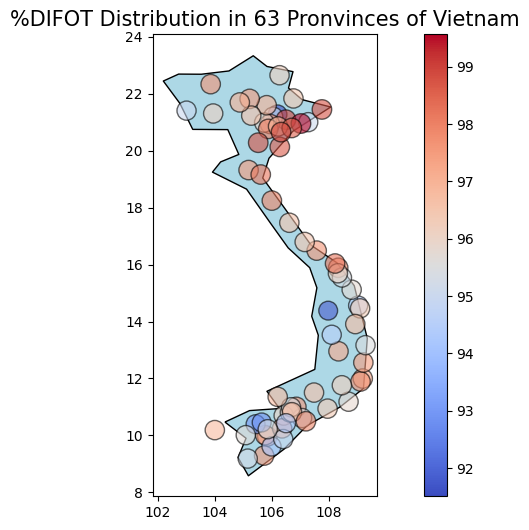

<Figure size 2000x800 with 0 Axes>

In [113]:
import pandas as pd
from io import StringIO

# Add in GPS of 63 Province of Viet Nam
data_str = """
Thành phố Hồ Chí Minh,10.8333,106.63278
Hà Nội,21.0333,105.85000
Hải Phòng,20.86194,106.68028
Cần Thơ,10.03278,105.78389
Đà Nẵng,16.05194,108.21528
Biên Hòa,10.95694,106.84306
Thanh Hoa,19.80750,105.77639
Nha Trang,12.23889,109.19694
Vũng Tàu,10.34583,107.08472
Thủ Đức,10.88333,106.72694
Huế,16.46278,107.58472
Buôn Ma Thuột,12.66667,108.03889
Thái Nguyên,21.56750,105.82556
Vinh,18.68083,105.68167
Hải Dương,20.93972,106.31250
Thủ Dầu Một,10.99333,106.65611
Nam Định,20.42000,106.16833
Rạch Giá,10.02083,105.09028
Hạ Long,20.97194,107.04528
Mỹ Tho,10.35417,106.36528
Quy Nhơn,13.77500,109.23333
Thái Bình,20.44750,106.33750
Đà Lạt,11.94556,108.44222
Phan Thiết,10.92222,108.10944
Cà Mau,9.18361,105.15000
Long Thành,10.79306,107.01361
Tuy Hòa,13.08222,109.31611
Cẩm Phả,21.01611,107.33194
Pleiku,13.98361,108.00000
Sóc Trăng,9.60389,105.97417
Phù Mỹ,14.21639,109.11694
Long Xuyên,10.37528,105.41833
Tây Ninh,11.36778,106.11917
Bảo Lộc,11.53056,107.77806
Bắc Ninh,21.18528,106.05639
Bạc Liêu,9.25889,105.75194
Chí Linh,21.16194,106.41806
Lạng Sơn,21.85417,106.76167
Vĩnh Long,10.24583,105.95833
Trà Vinh,9.95139,106.33472
Bến Lức,10.63194,106.49306
Bắc Giang,21.29139,106.18694
Tân An,10.53111,106.41250
Hưng Yên,20.63667,106.05694
Cam Ranh,11.91361,109.13694
Đồng Hới,17.46861,106.59944
Phú Quốc,10.29611,103.98667
Ninh Bình,20.25111,105.97500
Bình Minh,10.02917,105.85250
Lào Cai,22.44028,104.00278
Phan Rang – Tháp Chàm,11.56667,108.99167
Hoài Ân,14.30444,108.85528
Yên Bái,21.71667,104.89861
Vĩnh Yên,21.29889,105.60611
Móng Cái,21.53333,107.96667
Sa Đéc,10.30000,105.76667
Tam Kỳ,15.56528,108.49444
Kon Tum,14.35000,107.99861
Cao Bằng,22.66694,106.26028
Điện Biên Phủ,21.36667,103.00861
Tuyên Quang,21.81861,105.21167
Quảng Ngãi,15.12389,108.81167
Hội An,15.88056,108.33889
Hà Tĩnh,18.34083,105.90750
Sơn La,21.32722,103.91417
Đảo Côn Lôn,8.69306,106.60944
Thang Binh District,15.68944,108.38000
Quảng Trị,16.74694,107.19389
Gia Lâm,21.03333,105.95889
Cam Lâm,12.07556,109.14028
"""

# Using StringIO to convert file-like object
data_io = StringIO(data_str)

# Create DataFrame From String
data_df = pd.read_csv(data_io, header=None, names=["City", "Latitude", "Longitude"])


def haversine(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    
    # Earth radius in kilometers
    r = 6371  
    return c * r

def assign_province(customer_lat, customer_lon): 
    province_lons = data_df['Longitude'].values
    province_lats = data_df['Latitude'].values
    distances = haversine(province_lons, province_lats, customer_lon, customer_lat)
    nearest_index = np.argmin(distances)  # Get the index of the nearest province
    
    return data_df.loc[nearest_index, 'City']  # Find nearest province

# Assign the nearest province to each customer
df_geo['nearest_tinh'] = df_geo.apply(lambda row: assign_province(row['GPScuslatitude'], row['GPScuslongitude']), axis=1)

# Group data by the nearest province in df_geo
df_grouped = df_geo.groupby('nearest_tinh').agg({'%DIFOT': 'mean', 'GPScuslatitude': 'first', 'GPScuslongitude': 'first'}).reset_index()



import matplotlib.pyplot as plt

# Create a plot with a specified figure size

import geopandas as gpd
import matplotlib.pyplot as plt

# Load the world map data
world_data = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Filter for Asia and then further for Vietnam
df_grouped = gpd.GeoDataFrame (df_grouped, geometry = gpd.points_from_xy(
df_grouped.GPScuslongitude, df_grouped.GPScuslatitude))

axis = world_data[(world_data.continent == 'Asia') & (world_data.name == 'Vietnam')].plot(
    color='lightblue', edgecolor='black')


df_grouped.plot(
    ax=axis, 
    marker='o', 
    column='%DIFOT', 
    markersize=df_grouped['%DIFOT']*2,  # Point size will be proportional to %DIFOT
    cmap='coolwarm',  # Optional color map to highlight values
    legend=True,  # Optional legend for %DIFOT
    alpha=0.6,  # Optional transparency
    edgecolor='k'
)

# Add title and set figure size
plt.title('%DIFOT Distribution in 63 Pronvinces of Vietnam', fontsize=15)
fig = plt.gcf()
fig.set_size_inches(12, 6)

# Save and show the figure
fig.savefig('customer_distribution.png', dpi=500)
plt.figure(figsize=(20, 8))
plt.show()




Distance (Km)  Frequency Percentage Contribution (%)
          0-2 11,971,456                       19.4%
          2-4 12,692,534                       20.6%
          4-6 12,874,016                       20.9%
          6-8  6,779,159                       11.0%
         8-10  4,726,129                        7.7%
        10-12  3,184,928                        5.2%
        12-14  2,290,807                        3.7%
        14-16  1,787,365                        2.9%
        16-18  1,507,372                        2.4%
        18-20  1,044,667                        1.7%
        20-22  1,099,100                        1.8%
        22-24    898,232                        1.5%
        24-26    578,284                        0.9%
        26-28    268,393                        0.4%


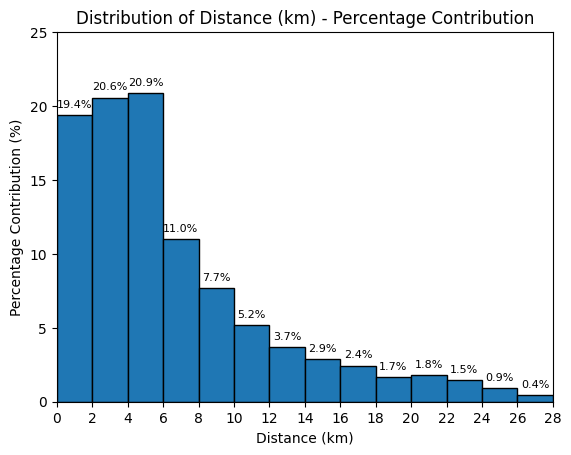

In [7]:
import matplotlib.pyplot as plt

# Step 1: Compute histogram in Spark using the specified bin edges
bin_edges = list(range(0, 30, 2))  # Adjusted to include 30 as the last bin edge
hist_data = filtered_outliers_df.select('distance_km').rdd.flatMap(lambda x: x).histogram(bin_edges)

# Extract bin edges and frequencies
frequencies = hist_data[1]
bin_edges = hist_data[0]

# Convert frequencies to percentage contribution
total = sum(frequencies)
percentages = [(freq / total) * 100 for freq in frequencies]

# Step 2: Plot the histogram with percentage contribution
plt.bar(bin_edges[:-1], percentages, width=2, edgecolor='black', align='edge')

# Add percentage labels on top of each bar
for i in range(len(percentages)):
    plt.text(bin_edges[i]+1, percentages[i] + 0.5, f'{percentages[i]:.1f}%', ha='center', fontsize=8)

plt.xlabel('Distance (km)')
plt.ylabel('Percentage Contribution (%)')
plt.title('Distribution of Distance (km) - Percentage Contribution')
plt.xticks(bin_edges)  # Set x-axis ticks to match bin edges

# Limit x-axis to 0 to 30
plt.xlim(0, 28)
plt.ylim(0, 25)
plt.xticks(bin_edges) 
#plt.show()


import pandas as pd

# Prepare data for tabular format
table_data = {
    'Distance (Km)': [f'{start}-{end}' for start, end in zip(bin_edges[:-1], bin_edges[1:])],
    'Frequency': [f'{freq:,}' for freq in frequencies],
    'Percentage Contribution (%)': [f'{round(pct, 1)}%' for pct in percentages]
}

# Create DataFrame
table_df = pd.DataFrame(table_data)

# Remove rows where 'Distance (Km)' is '28-30'
table_df = table_df[table_df['Distance (Km)'] != '28-30']

# Display the table with borders and no index
print(table_df.to_string(index=False, formatters={'Frequency': '{:<}'.format, 'Percentage Contribution (%)': '{:<}'.format}))

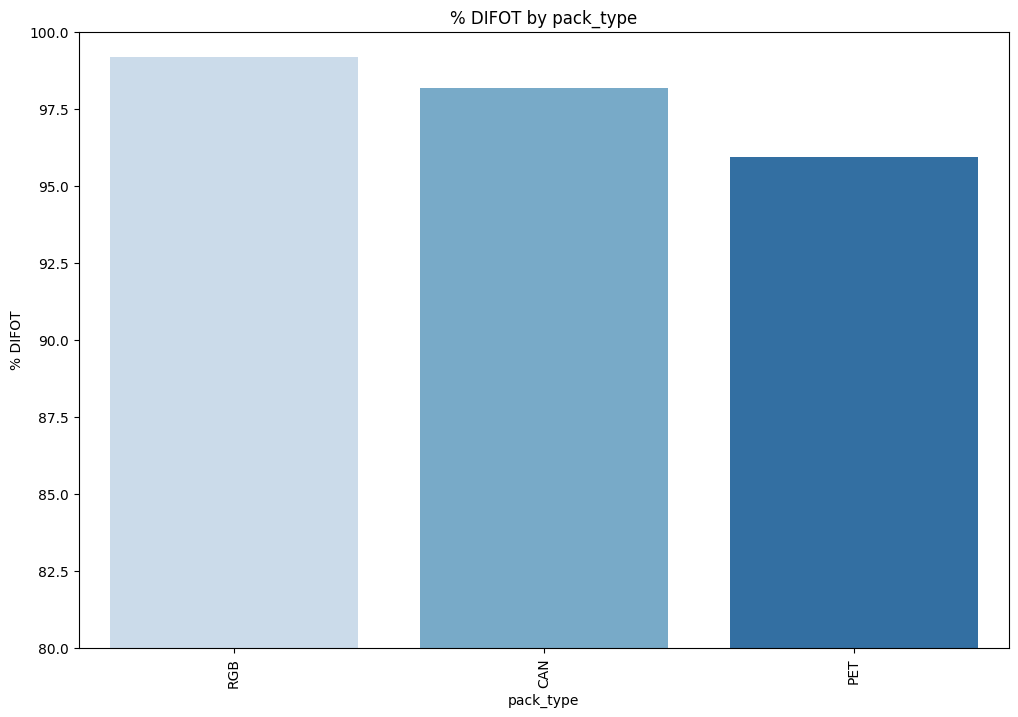

In [23]:
from pyspark.sql import functions as F
import numpy as np
from pyspark.sql.functions import month, year
import seaborn as sns
import matplotlib.pyplot as plt


# Create table have number of order_difot and order_non_difot

summary_df = filtered_outliers_df.groupBy("pack_type") \
    .agg(
        F.countDistinct(F.when(F.col('DIFOT') == 0, F.col('order_no'))).alias('order_non_difot'),
        F.countDistinct(F.when(F.col('DIFOT') == 1, F.col('order_no'))).alias('order_difot')
    )

# Calculate % DIFOT
summary_df = summary_df.withColumn(
    '%DIFOT',
    (F.col('order_difot') / (F.col('order_non_difot') + F.col('order_difot')) * 100)
)
summary_df = summary_df.toPandas()
summary_df = summary_df.dropna(subset=['pack_type'])
summary_df = summary_df.sort_values('%DIFOT', ascending=False)

plt.figure(figsize=(12, 8))
ax = sns.barplot(data=summary_df, x="pack_type", y="%DIFOT", palette="Blues")
# Add axis labels and title
plt.xlabel("pack_type")
plt.ylabel("% DIFOT")
plt.xticks(rotation=90)
plt.title("% DIFOT by pack_type")
plt.ylim(80, 100)

# Show the plot
plt.show()

/tmp/ipykernel_36/2398324663.py:27: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,100,5)


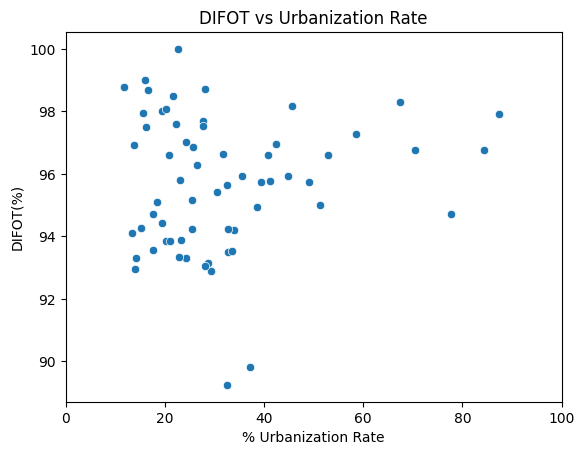

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by region and % urbanization rate, and calculate the mean of DIFOT

summary_df = filtered_outliers_df.groupBy('% urbanization rate') \
    .agg(
        F.countDistinct(F.when(F.col('DIFOT') == 0, F.col('order_no'))).alias('order_non_difot'),
        F.countDistinct(F.when(F.col('DIFOT') == 1, F.col('order_no'))).alias('order_difot')
    )

summary_df = summary_df.withColumn(
    '%DIFOT',
    (F.col('order_difot') / (F.col('order_non_difot') + F.col('order_difot')) * 100)
)
summary_df =summary_df.toPandas()

# Create the scatter plot
sns.scatterplot(data=summary_df , x='% urbanization rate', y='%DIFOT')

# Add plot labels and title
plt.xlabel('% Urbanization Rate')
plt.ylabel('DIFOT(%)')
plt.title('DIFOT vs Urbanization Rate')
#rangey_chart=list(range(0,100,5))
# plt.ylim(50,100,5)
plt.xlim(0,100,5)

# Show the plot
plt.show()


/tmp/ipykernel_36/1125933991.py:44: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_data = pivot_heat_top20.applymap(lambda x: '{:.1f}%'.format(x))


<function seaborn.matrix.heatmap(data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

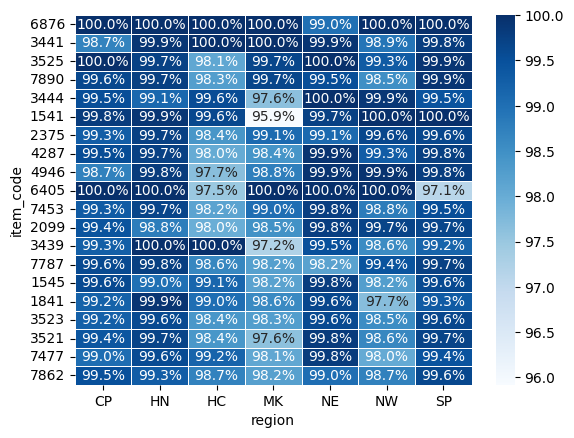

In [14]:
from pyspark.sql import functions as F
import numpy as np


# Create table have number of order_difot and order_non_difot
summary_df = filtered_outliers_df.groupBy('region', 'item_code') \
    .agg(
        F.countDistinct(F.when(F.col('DIFOT') == 0, F.col('order_no'))).alias('order_non_difot'),
        F.countDistinct(F.when(F.col('DIFOT') == 1, F.col('order_no'))).alias('order_difot')
    )

# Calculate % DIFOT
summary_df = summary_df.withColumn(
    '%DIFOT',
    (F.col('order_difot') / (F.col('order_non_difot') + F.col('order_difot')) * 100)
)
summary_df=summary_df.toPandas()
# create pivot table %DIFOT
pivot_heat = pd.pivot_table(
    summary_df,
    index='item_code',        
    columns='region',         
    values='%DIFOT'           
)
# Create col VN equal sum of all Regions
pivot_heat['VN'] = pivot_heat.sum(axis=1)

# Sort ASC by col VN & Show top 20
pivot_heat_top20 = pivot_heat.sort_values(by='VN', ascending=False).head(20)
pivot_heat_top20 = pivot_heat_top20.drop(columns=['VN'])
region_mapping = {
    'Central  Region': 'CP',
    'Hanoi Region': 'HN',
    'Ho Chi Minh Region': 'HC',
    'Mekong Delta Region': 'MK',
    'North East Region': 'NE',
    'North West Region': 'NW',
    'South Provinces Reg': 'SP'
}

pivot_heat_top20.rename(columns=region_mapping, inplace=True)


annot_data = pivot_heat_top20.applymap(lambda x: '{:.1f}%'.format(x))

# Create heatmap using annot format %
sns.heatmap(data=pivot_heat_top20,
            annot=annot_data,  #
            fmt="",  
            cmap="Blues", 
            linecolor='white', linewidths=0.5)


ax.set_yticklabels(yticks, rotation=0);
ax.set_xticklabels(xticks, rotation=90);
title1='TOP 20 ITEM CODE WITH HIGHEST % DIFOT'
ax.set_title(title1,loc='center',fontsize=18)

sns.heatmap


In [17]:
from pyspark.sql import functions as F
import numpy as np
from pyspark.sql.functions import month, year

# Create month and year from order_date
filtered_outliers_df = (
    filtered_outliers_df
    .withColumn('month', month(filtered_outliers_df['order_date']))
    .withColumn('year', year(filtered_outliers_df['order_date']))
)

# Create table have number of order_difot and order_non_difot

summary_df = filtered_outliers_df.groupBy('order_date') \
    .agg(
        F.countDistinct(F.when(F.col('DIFOT') == 0, F.col('order_no'))).alias('order_non_difot'),
        F.countDistinct(F.when(F.col('DIFOT') == 1, F.col('order_no'))).alias('order_difot')
    )

# Calculate % DIFOT
summary_df = summary_df.withColumn(
    '%DIFOT',
    (F.col('order_difot') / (F.col('order_non_difot') + F.col('order_difot')) * 100)
)
summary_df.show()

+----------+---------------+-----------+-----------------+
|order_date|order_non_difot|order_difot|           %DIFOT|
+----------+---------------+-----------+-----------------+
|2023-09-14|           2730|      43971| 94.1543007644376|
|2024-06-12|           2159|      36195|94.37086092715232|
|2024-02-05|           1393|      41608|96.76054045254762|
|2024-05-25|           1757|      25803|93.62481857764877|
|2023-06-23|            441|      44682|99.02267136493585|
|2023-11-29|           1831|      44324|96.03293251002059|
|2024-05-19|            836|      10808|92.82033665407077|
|2024-03-28|           8758|      54012|86.04747490839573|
|2023-08-28|           2153|      40407|94.94125939849624|
|2024-06-11|           1091|      39086|97.28451601662643|
|2023-07-04|           2098|      35560|94.42880662807372|
|2023-10-29|              2|        531|99.62476547842401|
|2023-08-03|            633|      39352|98.41690633987746|
|2024-06-23|            144|       8530|98.3398662670048

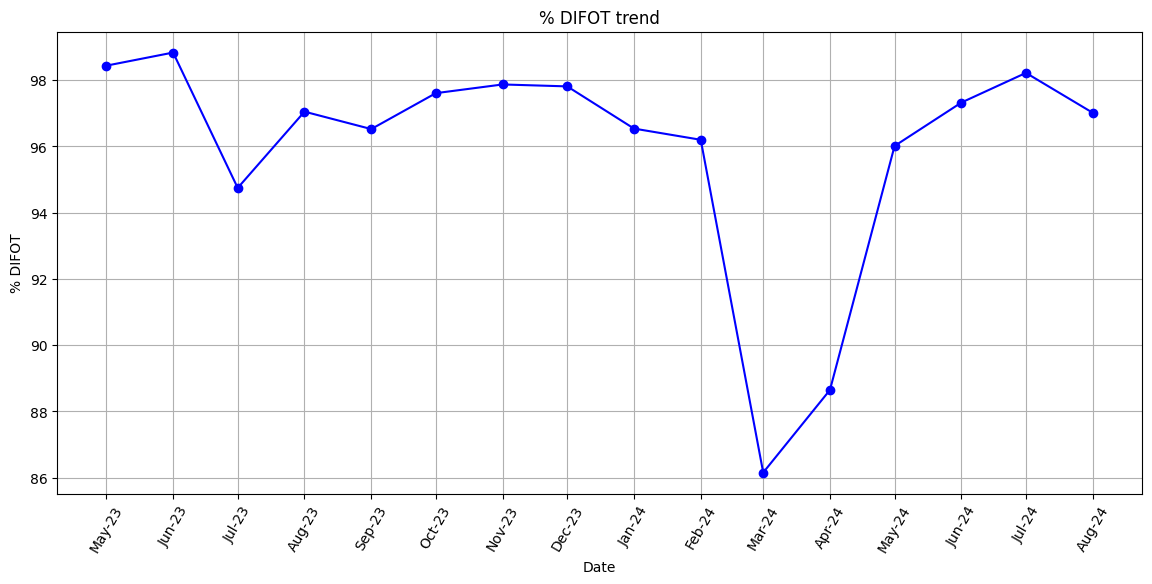

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates

# Add Col 'MMM-yy' to group by month and year 
summary_df = summary_df.withColumn(
    'month_year',
    F.date_format('order_date', 'yyyy-MM')
)

# Group 'month_year' and Calculate % DIFOT 
monthly_summary_df = summary_df.groupBy('month_year') \
    .agg(
        F.sum('order_difot').alias('total_difot'),
        F.sum('order_non_difot').alias('total_non_difot')
    ) \
    .withColumn(
        '%DIFOT',
        (F.col('total_difot') / (F.col('total_difot') + F.col('total_non_difot')) * 100)
    )

# Convert Pandas DataFrame
monthly_summary_pd = monthly_summary_df.select('month_year', '%DIFOT').toPandas()

# Format datetime for col'month_year' 
monthly_summary_pd['month_year'] = pd.to_datetime(monthly_summary_pd['month_year'], format='%Y-%m')

# Sort by 'month_year'
monthly_summary_pd = monthly_summary_pd.sort_values('month_year')

# Plot line chart
plt.figure(figsize=(14, 6))
plt.plot(monthly_summary_pd['month_year'], monthly_summary_pd['%DIFOT'], marker='o', linestyle='-', color='b')
plt.title('% DIFOT trend')
plt.xlabel('Date')
plt.ylabel('% DIFOT')

#labeling 'MMM-yy' for Ox
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%y'))

# Formating chart
plt.gca().set_xticks(monthly_summary_pd['month_year'])

plt.xticks(rotation=60)  
plt.grid(True)
plt.show()


**Training Model**

In [9]:
filtered_outliers_df.printSchema()
filtered_outliers_df.head(2)

root
 |-- key: string (nullable = true)
 |-- order_key: string (nullable = true)
 |-- order_date: date (nullable = true)
 |-- settlement_date: date (nullable = true)
 |-- region: string (nullable = true)
 |-- distributor_code: string (nullable = true)
 |-- customer_code: string (nullable = true)
 |-- segmentation: string (nullable = true)
 |-- channelname: string (nullable = true)
 |-- order_no: string (nullable = true)
 |-- item_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- pack_type: string (nullable = true)
 |-- pack_size: string (nullable = true)
 |-- key_so: string (nullable = true)
 |-- totalec_sr: double (nullable = true)
 |-- totalNSR_sr: double (nullable = true)
 |-- totalNSR_so: double (nullable = true)
 |-- totalec_so: double (nullable = true)
 |-- diff_ec: double (nullable = true)
 |-- diff_NSR: double (nullable = true)
 |-- GPScuslatitude: string (nullable = true)
 |-- GPScuslongitude: string (nullable = true)
 |-- GPSdistlatitude: string (nullab

[Row(key='2023-05-03-000029594165-0070603364', order_key='2023-05-03-000029594165-2023-05-03-0070603364', order_date=datetime.date(2023, 5, 3), settlement_date=datetime.date(2023, 5, 3), region='North East Region', distributor_code='0082100376', customer_code='0070603364', segmentation='DRINKING', channelname='Bronze', order_no='000029594165', item_code='2718', brand='*******', pack_type='PET', pack_size='510ML', key_so='03-05-2023-000029594165-2718', totalec_sr=0.125, totalNSR_sr=9624.99, totalNSR_so=9624.99, totalec_so=0.125, diff_ec=0.0, diff_NSR=0.0, GPScuslatitude='21.542798', GPScuslongitude='107.912195', GPSdistlatitude='21.533333', GPSdistlongitude='107.966667', distance_km=5.731530709820396, DeliveryDay=0.0, days_off_count=0.0, Dayprocessing=0.0, Ontime=1.0, Infull=1.0, DIFOT=1.0, city='Tỉnh Quảng Ninh', Province standard='Quang Ninh', % urbanization rate=67.5, isfreegood_order_no=0.0),
 Row(key='2023-05-03-000029594165-0070603364', order_key='2023-05-03-000029594165-2023-05-0

In [9]:
# Random Extract 10% dataset for Machine Learning Stage (Due to Data was too large)

import pandas as pd

X=filtered_outliers_df.sample(fraction= 0.1,seed=1505).select(
    'totalec_so', 'distance_km', 'DeliveryDay', 'days_off_count', 
    'Dayprocessing', '% urbanization rate','isfreegood_order_no','order_date',
    'region','segmentation', 'channelname','brand','pack_type','pack_size', 
)
X=X.toPandas()

# format datetime col order_date 
X['order_date'] = pd.to_datetime(X['order_date'])

# Create col month
X['month'] = X['order_date'].dt.month

#Create X and Y for ML Stage
X=X.values
import numpy as np
X = np.delete(X, 7, axis=1)

print(X.shape)

Y=filtered_outliers_df.sample(fraction= 0.1,seed=1505).select('DIFOT')
Y=Y.toPandas()

# Rename 'channelname' to 'segmentation' 
X.rename(columns={'channelname': 'temp_channelname', 'segmentation': 'channelname'}, inplace=True)
X.rename(columns={'temp_channelname': 'segmentation'}, inplace=True)

X['channelname'].fillna('DRINKING', inplace=True)
X['segmentation'].fillna('Bronze', inplace=True)
X['brand'].fillna('*******', inplace=True)
X['pack_type'].fillna('PET', inplace=True)
X['pack_size'].fillna('320ML',inplace=True)


   totalec_so  distance_km  DeliveryDay  days_off_count  Dayprocessing  \
0       0.125     1.888673          1.0             0.0            1.0   
1       0.125     0.786568          1.0             0.0            1.0   
2       0.125     0.786568          1.0             0.0            1.0   
3       0.125     6.571847          0.0             0.0            0.0   
4       0.250     6.571847          0.0             0.0            0.0   

   % urbanization rate  isfreegood_order_no order_date             region  \
0                87.45                  0.0 2023-05-03    Central  Region   
1                32.76                  0.0 2023-05-03    Central  Region   
2                32.76                  0.0 2023-05-03    Central  Region   
3                27.66                  0.0 2023-05-03  North East Region   
4                27.66                  0.0 2023-05-03  North East Region   

  segmentation channelname              brand pack_type pack_size  month  
0     DRINKING   

/tmp/ipykernel_36/2244283122.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['channelname'].fillna('DRINKING', inplace=True)
/tmp/ipykernel_36/2244283122.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

In [10]:
#Check NaN value of X
df_X = pd.DataFrame(X)

rows_with_nan = df_X[df_X.isna().any(axis=1)]

# Show NaN value
print("Rows with NaN values:")
print(rows_with_nan)

Rows with NaN values:
Empty DataFrame
Columns: [totalec_so, distance_km, DeliveryDay, days_off_count, Dayprocessing, % urbanization rate, isfreegood_order_no, order_date, region, channelname, segmentation, brand, pack_type, pack_size, month]
Index: []


**Encode Categorical Data**

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
import pandas as pd
import matplotlib.pyplot as plt

# Filter numerical variables
numeric_var = ['totalec_so', 'distance_km', 'DeliveryDay', 'days_off_count', 'Dayprocessing', '% urbanization rate', 'isfreegood_order_no']
X_numeric = X[numeric_var] 

import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier

#  Filter categorical variables
categorical_var = ['region', 'channelname', 'segmentation', 'brand', 'pack_type', 'pack_size', 'month']

# One-Hot Encoding categorical variables
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_var])

# Convert DataFrame
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_var))



/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [12]:
finalfeatureselection=pd.concat([X[numeric_var].reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)
finalfeatureselection


,totalec_so,distance_km,DeliveryDay,days_off_count,Dayprocessing,% urbanization rate,isfreegood_order_no,region_Hanoi Region,region_Ho Chi Minh Region,region_Mekong Delta Region,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.125,1.888673,1.0,0.0,1.0,87.45,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.125,0.786568,1.0,0.0,1.0,32.76,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.125,0.786568,1.0,0.0,1.0,32.76,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.125,6.571847,0.0,0.0,0.0,27.66,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.250,6.571847,0.0,0.0,0.0,27.66,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6168919,0.250,3.778068,1.0,0.0,1.0,49.05,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6168920,0.250,0.505470,1.0,0.0,1.0,87.45,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6168921,0.250,6.023470,1.0,0.0,1.0,35.50,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6168922,0.250,1.585447,0.0,0.0,0.0,49.05,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


**Split data to data train and data test**

In [45]:
# Import library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Install 
!pip install xgboost
!pip install imbalanced-learn

**Handling Imbalance Dataset**

In [46]:

X_final=finalfeatureselection[['Dayprocessing','DeliveryDay','totalec_so','distance_km','days_off_count','% urbanization rate','isfreegood_order_no','month_3','pack_size_297ML','month_4','month_8','region_North West Region','pack_size_300ML','branding','segmentation_Gold']]
# Using undersampling NearMiss to solve imbalance dataset

X_final.shape,Y.shape
from imblearn.under_sampling import NearMiss
nm = NearMiss()

X_res, y_res = nm.fit_resample(X_final,Y)

X_res.shape, y_res.shape

((265056, 15), (265056, 1))

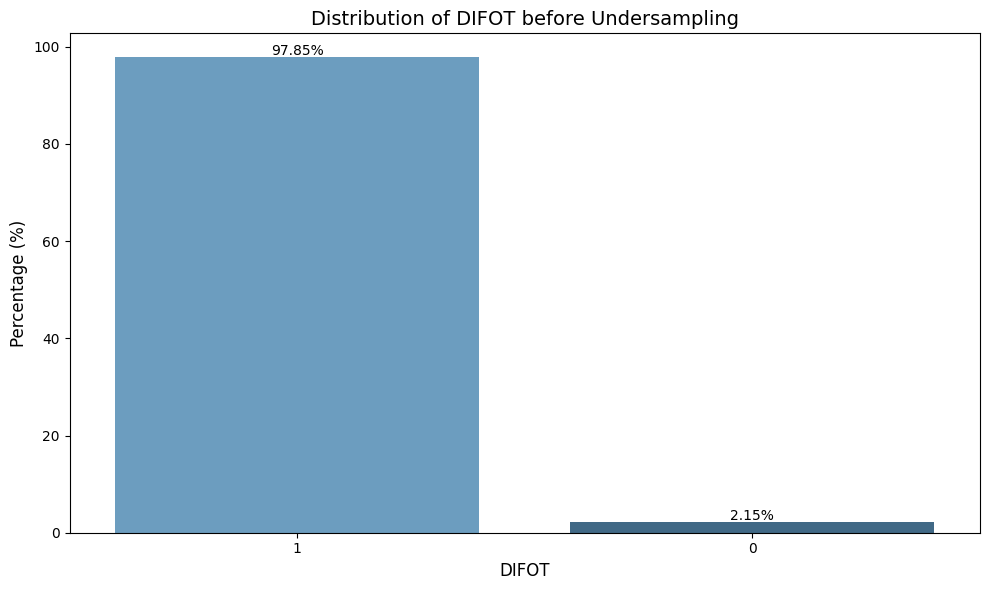

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame distinct value DIFOT 
distinct_values_counts = Y['DIFOT'].value_counts().reset_index()
distinct_values_counts.columns = ['DIFOT', 'Count']
distinct_values_counts['DIFOT'] = distinct_values_counts['DIFOT'].astype(float)
distinct_values_counts['Percentage'] = (distinct_values_counts['Count'] / distinct_values_counts['Count'].sum()) * 100
distinct_values_counts = distinct_values_counts.sort_values(by='DIFOT', ascending=True)

# Visualize bar chart 
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=distinct_values_counts, x='DIFOT', y='Percentage', palette="Blues_d", order=[1, 0])

for index, row in distinct_values_counts.iterrows():
    ax.text(row.name, row['Percentage'] + 0.5, f"{row['Percentage']:.2f}%", color='black', ha="center")

plt.title('Distribution of DIFOT before Undersampling', fontsize=14)
plt.xlabel('DIFOT', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.tight_layout()

plt.show()


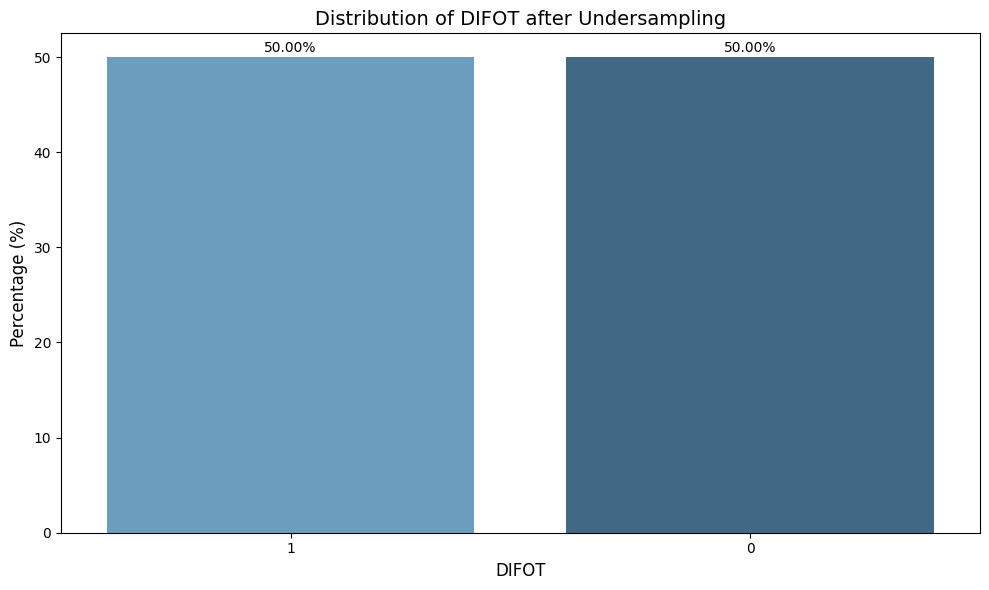

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create DataFrame distinct value DIFOT 
distinct_values_counts = y_res['DIFOT'].value_counts().reset_index()
distinct_values_counts.columns = ['DIFOT', 'Count']  
distinct_values_counts['DIFOT'] = distinct_values_counts['DIFOT'].astype(float)
distinct_values_counts['Percentage'] = (distinct_values_counts['Count'] / distinct_values_counts['Count'].sum()) * 100
distinct_values_counts = distinct_values_counts.sort_values(by='DIFOT', ascending=True)

# Visualize bar chart 
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=distinct_values_counts, x='DIFOT', y='Percentage', palette="Blues_d", order=[1, 0])
for index, row in distinct_values_counts.iterrows():
    ax.text(row.name, row['Percentage'] + 0.5, f"{row['Percentage']:.2f}%", color='black', ha="center")
plt.title('Distribution of DIFOT after Undersampling', fontsize=14)
plt.xlabel('DIFOT', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

plt.tight_layout()

plt.show()


**Training Model**

***Decision Tree Model***

In [108]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Create Decision Tree model
model = DecisionTreeClassifier(random_state=1505)

# K-Fold cross-validation using k=5
k = 5
scores = cross_val_score(model, X_train, Y_train, cv=k, scoring='accuracy')

for fold, score in enumerate(scores, start=1):
    print(f'Accuracy for fold {fold}: {score:.4f}')

# Calculate mean & std accuracy
mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'\nMean Accuracy (K-Fold = {k}): {mean_accuracy:.4f} ± {std_accuracy:.4f}')


Accuracy for fold 1: 0.9602
Accuracy for fold 2: 0.9587
Accuracy for fold 3: 0.9588
Accuracy for fold 4: 0.9596
Accuracy for fold 5: 0.9601

Mean Accuracy (K-Fold = 5): 0.9595 ± 0.0006


In [47]:
#DecisionTreeClassifier Model

from sklearn.model_selection import train_test_split
np.random.seed(1505)
X_train,X_test,Y_train,Y_test =train_test_split(X_res,y_res,test_size=0.2 )
X_train.shape,Y_train.shape



# run decision tree & random forest model
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))



dt_model=DecisionTreeClassifier(random_state=1505)


dt_model.fit(X_train,Y_train)


# Predict test set
y_pred = dt_model.predict(X_test)

print_scores(Y_test, y_pred)

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96     26412
         1.0       0.96      0.96      0.96     26600

    accuracy                           0.96     53012
   macro avg       0.96      0.96      0.96     53012
weighted avg       0.96      0.96      0.96     53012



In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

def print_single_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Example usage with your DecisionTreeClassifier model

# Train the model
dt_model=DecisionTreeClassifier(random_state=1505)

dt_model.fit(X_train, Y_train)

# Predict test data
y_pred = dt_model.predict(X_test)

# Print the single representative scores
print_single_score(Y_test, y_pred)


Accuracy: 0.9605
Precision: 0.9605
Recall: 0.9605
F1-Score: 0.9605


***Random Forest Model***

In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

model = RandomForestClassifier(random_state=1505)

k = 5
scores = cross_val_score(model, X_train, Y_train, cv=k, scoring='accuracy')

for fold, score in enumerate(scores, start=1):
    print(f'Accuracy for fold {fold}: {score:.4f}')

mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'\nMean Accuracy (K-Fold = {k}): {mean_accuracy:.4f} ± {std_accuracy:.4f}')


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Accuracy for fold 1: 0.9643
Accuracy for fold 2: 0.9641
Accuracy for fold 3: 0.9643
Accuracy for fold 4: 0.9656
Accuracy for fold 5: 0.9671

Mean Accuracy (K-Fold = 5): 0.9651 ± 0.0012


In [102]:
#RandomForestClassifier Model


from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))



dt_model=RandomForestClassifier(random_state=1505)


dt_model.fit(X_train,Y_train)


# Du doan du lieu test
y_pred = dt_model.predict(X_test)

# in ra ket qua
print_scores(Y_test, y_pred)

/tmp/ipykernel_36/193944023.py:14: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_model.fit(X_train,Y_train)


              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97     26456
         1.0       0.96      0.97      0.97     26560

    accuracy                           0.97     53016
   macro avg       0.97      0.97      0.97     53016
weighted avg       0.97      0.97      0.97     53016



In [22]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_single_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Example usage with your DecisionTreeClassifier model
dt_model=RandomForestClassifier(random_state=1505)

# Train the model
dt_model.fit(X_train, Y_train)

# Predict test data
y_pred = dt_model.predict(X_test)

# Print the single representative scores
print_single_score(Y_test, y_pred)


/tmp/ipykernel_36/4227275418.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  dt_model.fit(X_train, Y_train)


Accuracy: 0.9657
Precision: 0.9657
Recall: 0.9657
F1-Score: 0.9657


***XGB Model***

In [48]:
#XGBClassifier Model
from sklearn.model_selection import train_test_split
np.random.seed(1505)
X_train,X_test,Y_train,Y_test =train_test_split(X_res,y_res,test_size=0.2 )
X_train.shape,Y_train.shape

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def print_scores(y_true, y_pred):
  print(classification_report(y_true, y_pred))



dt_model=XGBClassifier(use_label_encoder=False,eval_metrics='logloss',random_state=1505)


dt_model.fit(X_train,Y_train)


# Predict testset
y_pred = dt_model.predict(X_test)
print_scores(Y_test, y_pred)

/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:59:34] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97     26412
         1.0       0.96      0.98      0.97     26600

    accuracy                           0.97     53012
   macro avg       0.97      0.97      0.97     53012
weighted avg       0.97      0.97      0.97     53012



In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_single_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Example usage with your DecisionTreeClassifier model
dt_model=XGBClassifier(use_label_encoder=False,eval_metrics='logloss',random_state=1505)

# Train the model
dt_model.fit(X_train, Y_train)

# Predict test data
y_pred = dt_model.predict(X_test)

# Print the single representative scores
print_single_score(Y_test, y_pred)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [08:22:24] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9708
Precision: 0.9711
Recall: 0.9708
F1-Score: 0.9708


In [25]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_single_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

# Example usage with your DecisionTreeClassifier model
dt_model=XGBClassifier(n_estimators=200,use_label_encoder=False,eval_metrics='logloss',random_state=1505)

# Train the model
dt_model.fit(X_train, Y_train)

# Predict test data
y_pred = dt_model.predict(X_test)

# Print the single representative scores
print_single_score(Y_test, y_pred)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [08:31:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9715
Precision: 0.9718
Recall: 0.9715
F1-Score: 0.9715


In [110]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Create XGB Model
model = XGBClassifier(use_label_encoder=False,eval_metrics='logloss',random_state=1505)
k = 5
scores = cross_val_score(model, X_train, Y_train, cv=k, scoring='accuracy')

for fold, score in enumerate(scores, start=1):
    print(f'Accuracy for fold {fold}: {score:.4f}')

mean_accuracy = np.mean(scores)
std_accuracy = np.std(scores)
print(f'\nMean Accuracy (K-Fold = {k}): {mean_accuracy:.4f} ± {std_accuracy:.4f}')


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:20:38] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:20:39] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:20:40] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:20:42] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)
/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [19:20:43] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_metrics" } are not used.



Accuracy for fold 1: 0.9705
Accuracy for fold 2: 0.9683
Accuracy for fold 3: 0.9681
Accuracy for fold 4: 0.9689
Accuracy for fold 5: 0.9699

Mean Accuracy (K-Fold = 5): 0.9691 ± 0.0009


                Feature  Importance
3           distance_km      1218.0
5   % urbanization rate       889.0
2            totalec_so       455.0
14    segmentation_Gold       172.0
6   isfreegood_order_no       161.0


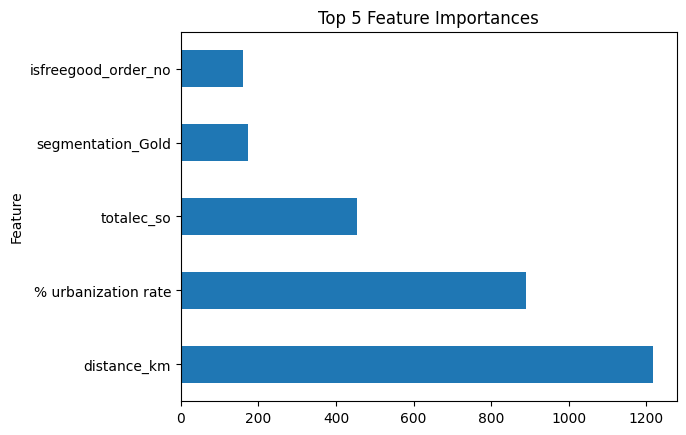

In [50]:
# List top 5 feature in XGB model
# Choosing metric weight
importance = dt_model.get_booster().get_score(importance_type='weight')
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance'])
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_10_features = importance_df.head(5)
print(top_10_features)

# Visual top 5 feature
top_10_features.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Top 5 Feature Importances')
plt.show()


<Figure size 2000x1000 with 0 Axes>

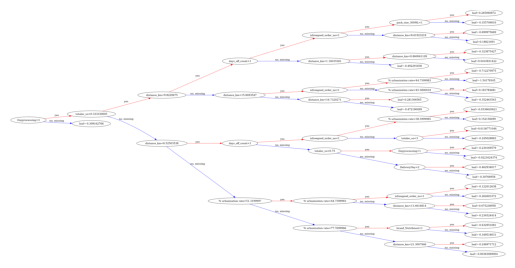

Nội dung cây thứ 10:
0:[Dayprocessing<3] yes=1,no=2,missing=2
	1:[totalec_so<0.333330005] yes=3,no=4,missing=4
		3:[distance_km<9.8229475] yes=5,no=6,missing=6
			5:[days_off_count<1] yes=9,no=10,missing=10
				9:[isfreegood_order_no<1] yes=17,no=18,missing=18
					17:[pack_size_300ML<1] yes=33,no=34,missing=34
						33:leaf=0.265060872
						34:leaf=-0.355709016
					18:[distance_km<8.61923218] yes=35,no=36,missing=36
						35:leaf=-0.699975669
						36:leaf=0.18821691
				10:[distance_km<1.16035581] yes=19,no=20,missing=20
					19:[distance_km<0.860061109] yes=37,no=38,missing=38
						37:leaf=-0.323875427
						38:leaf=0.0410831422
					20:leaf=-0.492291838
			6:[distance_km<15.8493547] yes=11,no=12,missing=12
				11:[isfreegood_order_no<1] yes=21,no=22,missing=22
					21:[% urbanization rate<44.7599983] yes=39,no=40,missing=40
						39:leaf=-0.712270975
						40:leaf=-1.54178345
					22:[% urbanization rate<45.5800018] yes=41,no=42,missing=42
						41:leaf=0.181784481
						42:leaf

In [31]:
# Demo one tree in XGB classifier model 


import matplotlib.pyplot as plt
from xgboost import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, num_trees=9, rankdir='LR')
plt.show()

# List out features in tree
booster = dt_model.get_booster()
feature_names = booster.feature_names

tree = booster.get_dump()[9]  

# Print features
print("Nội dung cây thứ 10:")
print(tree)

features_in_tree = set()

for line in tree.split('\n'):
    if 'feature' in line:
        parts = line.split(' ')
        for part in parts:
            if 'feature' in part:
                feature_index = int(part.split('[')[-1].replace(']', ''))
                features_in_tree.add(feature_names[feature_index])

print("Các đặc trưng xuất hiện trong cây thứ 10:")
for feature in features_in_tree:
    print(feature)


**Performance Evaluation**

In [52]:


from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score
import numpy as np

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=1505)

k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=1505)

# List out scoring Accuracy, Precision, Recall and F1-Score
accuracy = make_scorer(accuracy_score)
precision = make_scorer(precision_score)
recall = make_scorer(recall_score)
f1 = make_scorer(f1_score)

accuracy_scores = cross_val_score(model, X_test, Y_test, cv=cv, scoring=accuracy)
precision_scores = cross_val_score(model, X_test, Y_test, cv=cv, scoring=precision)
recall_scores = cross_val_score(model, X_test, Y_test, cv=cv, scoring=recall)
f1_scores = cross_val_score(model, X_test, Y_test, cv=cv, scoring=f1)

# Print scoring
for fold, (a_score, p_score, r_score, f1_score) in enumerate(zip(accuracy_scores, precision_scores, recall_scores, f1_scores), start=1):
    print(f'Fold {fold}: Accuracy={a_score:.4f}, Precision={p_score:.4f}, Recall={r_score:.4f}, F1-Score={f1_score:.4f}')

# Calcutlate mean and std
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision = np.mean(precision_scores)
std_precision = np.std(precision_scores)
mean_recall = np.mean(recall_scores)
std_recall = np.std(recall_scores)
mean_f1 = np.mean(f1_scores)
std_f1 = np.std(f1_scores)

print(f'\nMean Accuracy (K-Fold = {k}): {mean_accuracy:.4f} ± {std_accuracy:.4f}')
print(f'Mean Precision (K-Fold = {k}): {mean_precision:.4f} ± {std_precision:.4f}')
print(f'Mean Recall (K-Fold = {k}): {mean_recall:.4f} ± {std_recall:.4f}')
print(f'Mean F1-Score (K-Fold = {k}): {mean_f1:.4f} ± {std_f1:.4f}')


Fold 1: Accuracy=0.9677, Precision=0.9574, Recall=0.9793, F1-Score=0.9682
Fold 2: Accuracy=0.9685, Precision=0.9579, Recall=0.9803, F1-Score=0.9690
Fold 3: Accuracy=0.9695, Precision=0.9565, Recall=0.9840, F1-Score=0.9701
Fold 4: Accuracy=0.9656, Precision=0.9542, Recall=0.9784, F1-Score=0.9661
Fold 5: Accuracy=0.9676, Precision=0.9565, Recall=0.9799, F1-Score=0.9681

Mean Accuracy (K-Fold = 5): 0.9678 ± 0.0013
Mean Precision (K-Fold = 5): 0.9565 ± 0.0013
Mean Recall (K-Fold = 5): 0.9804 ± 0.0019
Mean F1-Score (K-Fold = 5): 0.9683 ± 0.0013


***Visualize Result***

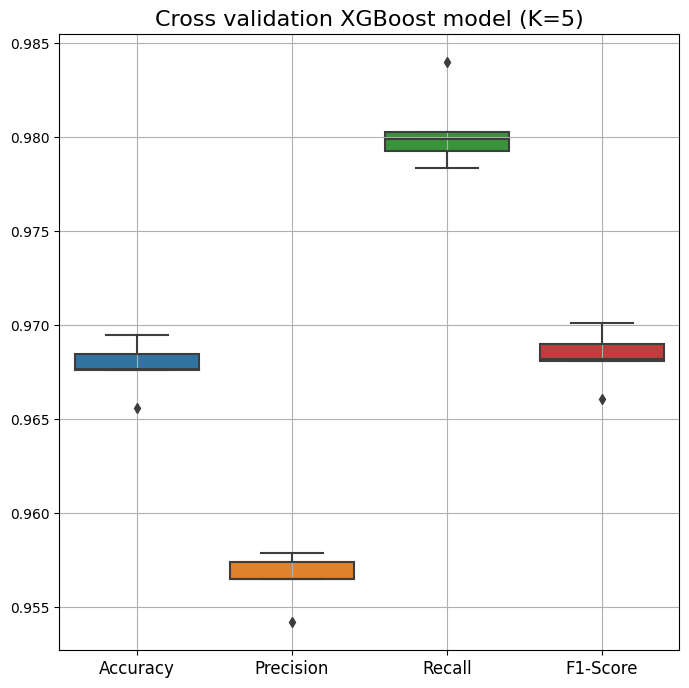

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Data of all folds
data = {
    'Fold': ['Fold 1', 'Fold 2', 'Fold 3', 'Fold 4', 'Fold 5'],
    'Accuracy': [0.9677, 0.9685, 0.9695, 0.9656, 0.9676],
    'Precision': [0.9574, 0.9579, 0.9565, 0.9542, 0.9565],
    'Recall': [0.9793, 0.9803, 0.9840, 0.9784, 0.9799],
    'F1-Score': [0.9682, 0.9690, 0.9701, 0.9661, 0.9681]
}

df = pd.DataFrame(data)

df_melted = df.melt(id_vars='Fold', value_vars=['Accuracy', 'Precision', 'Recall', 'F1-Score'],
                    var_name='Metric', value_name='Value')

# Plot Box & Whisper chart
plt.figure(figsize=(8, 8)) 
sns.boxplot(x='Metric', y='Value', data=df_melted)
plt.title('Cross validation XGBoost model (K=5)', fontsize=16)
plt.xlabel('')  
plt.ylabel('')  
plt.xticks(fontsize=12)
plt.grid(True)
plt.show()


**Visual Result of all model**

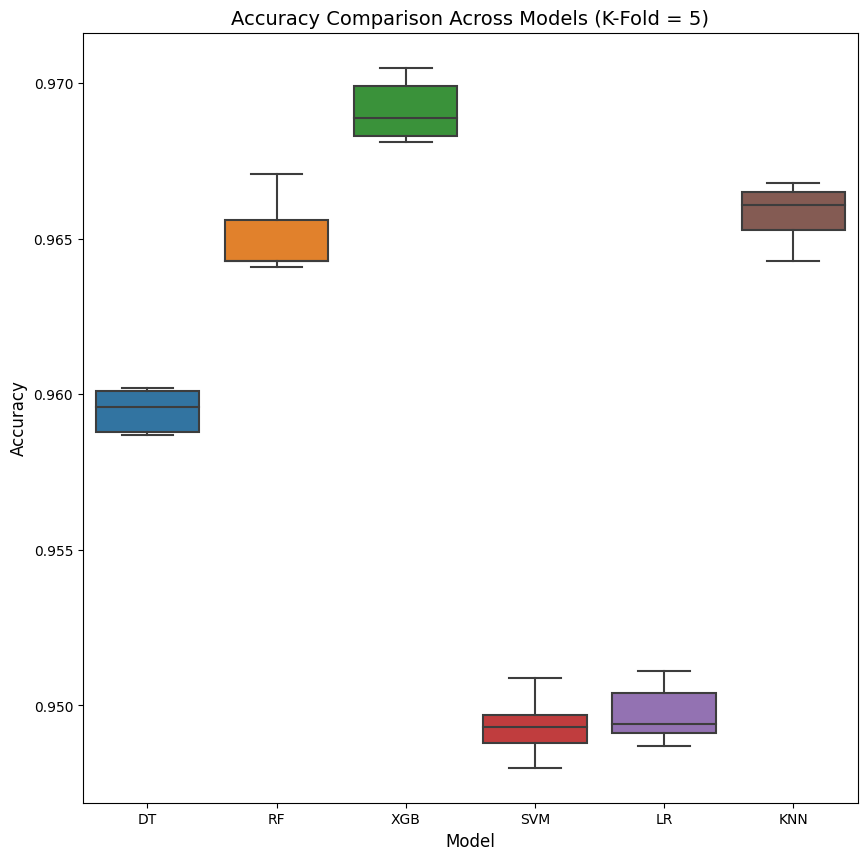

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Accuracies for each model
dt_accuracies = [0.9602, 0.9587, 0.9588, 0.9596, 0.9601]
rf_accuracies = [0.9643, 0.9641, 0.9643, 0.9656, 0.9671]
xgb_accuracies = [0.9705, 0.9683, 0.9681, 0.9689, 0.9699]
svm_accuracies = [0.9497, 0.9480, 0.9493, 0.9509, 0.9488]
lr_accuracies = [0.9494, 0.9491, 0.9504, 0.9511, 0.9487]
kn_accuracies = [0.9665, 0.9653, 0.9661, 0.9668, 0.9643]

# Create a list of models and corresponding accuracies
data = {
    'Model': ['DT'] * 5 + ['RF'] * 5 + ['XGB'] * 5 + 
             ['SVM'] * 5 + ['LR'] * 5 + ['KNN'] * 5,
    'Accuracy': dt_accuracies + rf_accuracies + xgb_accuracies + svm_accuracies + lr_accuracies + kn_accuracies
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Create the box plot
plt.figure(figsize=(10, 10))
sns.boxplot(x='Model', y='Accuracy', data=df)

# Add title and labels
plt.title('Accuracy Comparison Across Models (K-Fold = 5)', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

# Show the plot
plt.show()


**Checking overfiting and underfitting**

In [16]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluating in traningset
    train_accuracy = accuracy_score(Y_train, y_train_pred)
    train_precision = precision_score(Y_train, y_train_pred)
    train_recall = recall_score(Y_train, y_train_pred)
    train_f1 = f1_score(Y_train, y_train_pred)
    
    # Evaluating in testset
    test_accuracy = accuracy_score(Y_test, y_test_pred)
    test_precision = precision_score(Y_test, y_test_pred)
    test_recall = recall_score(Y_test, y_test_pred)
    test_f1 = f1_score(Y_test, y_test_pred)
    
    # Print result
    print("Training Performance:")
    print(f"Accuracy: {train_accuracy:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1-Score: {train_f1:.4f}")
    print("\nTest Performance:")
    print(f"Accuracy: {test_accuracy:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1-Score: {test_f1:.4f}")
    
    # Compare testset and trainingset
    print("\nModel Evaluation:")
    if train_accuracy > test_accuracy + 0.05:
        print("The model is likely overfitting.")
    elif train_accuracy < test_accuracy - 0.05:
        print("The model is likely underfitting.")
    else:
        print("The model is performing well without signs of overfitting or underfitting.")
        

from sklearn.tree import DecisionTreeClassifier
dt_model=XGBClassifier(use_label_encoder=False,eval_metrics='logloss',random_state=1505)

evaluate_model(dt_model, X_train, Y_train, X_test, Y_test)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [22:42:49] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


Training Performance:
Accuracy: 0.9724, Precision: 0.9613, Recall: 0.9843, F1-Score: 0.9727

Test Performance:
Accuracy: 0.9705, Precision: 0.9597, Recall: 0.9825, F1-Score: 0.9709

Model Evaluation:
The model is performing well without signs of overfitting or underfitting.
